In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns

In [4]:
ricci = pd.read_csv("../data sets/ricci.csv")

In [171]:
# Quick look into the data
ricci

Position   Oral  Written Race  Combine
0       Captain  89.52       95    W   92.808
1       Captain  80.00       95    W   89.000
2       Captain  82.38       87    W   85.152
3       Captain  88.57       76    W   81.028
4       Captain  76.19       84    W   80.876
5       Captain  76.19       82    H   79.676
6       Captain  76.19       82    W   79.676
7       Captain  70.00       84    H   78.400
8       Captain  73.81       81    W   78.124
9       Captain  84.29       72    W   76.916
10      Captain  87.62       69    W   76.448
11      Captain  80.00       74    W   76.400
12      Captain  79.05       74    H   76.020
13      Captain  73.81       77    W   75.724
14      Captain  76.67       74    W   75.068
15      Captain  82.38       70    B   74.952
16      Captain  73.33       74    W   73.732
17      Captain  70.00       76    W   73.600
18      Captain  68.57       74    B   71.828
19      Captain  82.38       64    W   71.352
20      Captain  56.67       81    W   71.268
21      Captain  70.95       70    B   70.380
22      Captain  62.38       75    W   69.952
23      Captain  78.57       64    W   69.828
24      Captain  71.43       68    W   69.372
25      Captain  71.43       68    W   69.372
26      Captain  59.05       76    W   69.220
27      Captain  60.48       75    H   69.192
28      Captain  57.14       75    W   67.856
29      Captain  52.38       77    B   67.152
..          ...    ...      ...  ...      ...
88   Lieutenant  50.42       75    W   65.168
89   Lieutenant  57.50       70    H   65.000
90   Lieutenant  69.17       60    B   63.668
91   Lieutenant  51.67       71    H   63.268
92   Lieutenant  71.67       57    W   62.868
93   Lieutenant  50.42       71    H   62.768
94   Lieutenant  56.25       66    W   62.100
95   Lieutenant  56.67       64    B   61.068
96   Lieutenant  56.25       64    B   60.900
97   Lieutenant  42.50       73    H   60.800
98   Lieutenant  51.25       67    H   60.700
99   Lieutenant  55.00       64    B   60.400
100  Lieutenant  51.25       66    B   60.100
101  Lieutenant  49.58       67    W   60.032
102  Lieutenant  60.00       60    W   60.000
103  Lieutenant  46.25       68    H   59.300
104  Lieutenant  60.83       58    B   59.132
105  Lieutenant  57.92       58    W   57.968
106  Lieutenant  51.25       62    W   57.700
107  Lieutenant  44.58       66    W   57.432
108  Lieutenant  44.17       66    H   57.268
109  Lieutenant  45.42       65    W   57.168
110  Lieutenant  55.83       58    B   57.132
111  Lieutenant  54.58       58    W   56.632
112  Lieutenant  58.75       55    B   56.500
113  Lieutenant  40.83       64    H   54.732
114  Lieutenant  52.08       56    B   54.432
115  Lieutenant  48.33       58    H   54.132
116  Lieutenant  52.92       49    B   50.568
117  Lieutenant  45.83       46    B   45.932

[118 rows x 5 columns]

#### Calculate the minimum, maximum, mean and median of the combined score for all entries:

In [172]:
print('Min: ' + str(ricci.max()['Combine']))
print('Max: ' + str(ricci.min()['Combine']))
print('Mean: ' + str(ricci.mean()['Combine']))
print('Median: ' + str(ricci.median()['Combine']))

Min: 92.80799999999999
Max: 45.931999999999995
Mean: 69.2008813559322
Median: 69.50200000000001


#### Lets take a look at the data distribution

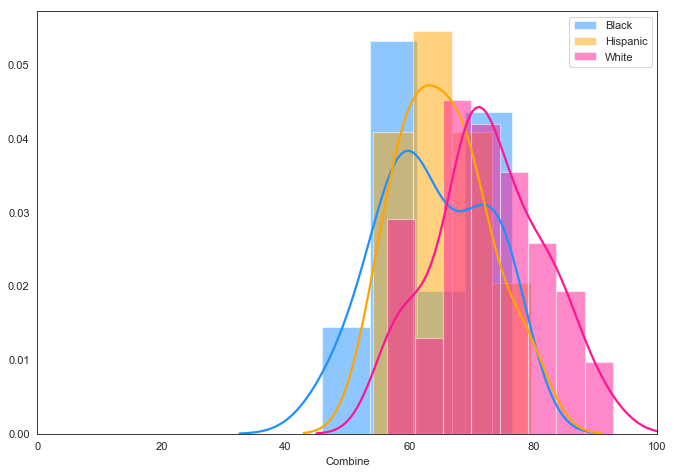

In [173]:
# sns.set_style("white")


# Import data
x1 = ricci.loc[ricci.Race=='B', 'Combine']
x2 = ricci.loc[ricci.Race=='H', 'Combine']
x3 = ricci.loc[ricci.Race=='W', 'Combine']

# Plot
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Black", **kwargs)
sns.distplot(x2, color="orange", label="Hispanic", **kwargs)
sns.distplot(x3, color="deeppink", label="White", **kwargs)
plt.xlim(0,100)
plt.legend();

#### Scatter plot of the combined result in in regard to the sensitiv attribute race:

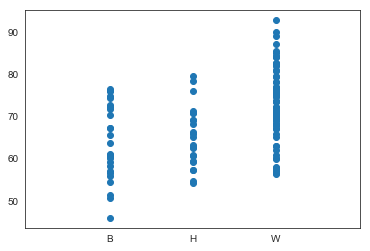

In [174]:
u, inv = np.unique(ricci['Race'], return_inverse=True) 
plt.scatter(inv, ricci['Combine'])
plt.xticks(range(len(u)), u)
plt.margins(x=0.5)
plt.show()

#### Now lets analyse if we get matching results for the oral/written exam:

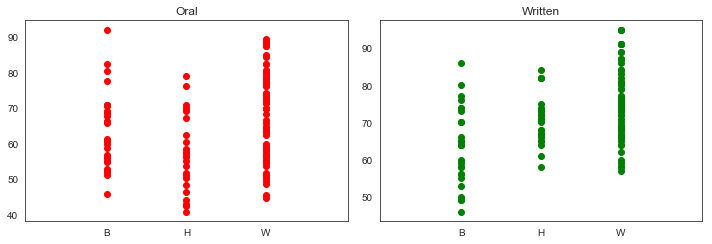

In [175]:
u, inv = np.unique(ricci['Race'], return_inverse=True) 

plt.figure(figsize=(10,3.5))
plt.subplot(1, 2, 1)
plt.title('Oral')
plt.scatter(inv, ricci['Oral'], color='red')
plt.xticks(range(len(u)), u)
plt.margins(x=0.5)

plt.subplot(1, 2, 2)
plt.title('Written')
plt.scatter(inv, ricci['Written'], color='green')
plt.xticks(range(len(u)), u)
plt.margins(x=0.5)
plt.tight_layout()
plt.show()

#### Now we create violin plots to get a better understanding of the data distribution

#### First for the Combined result:

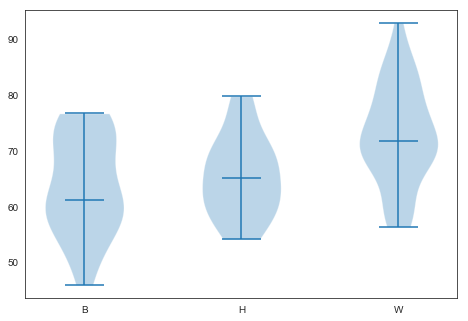

In [176]:
is_black = ricci['Race'] =='B'
is_hispanic = ricci['Race'] =='H'
is_white = ricci['Race'] =='W'
B = ricci[is_black]
H = ricci[is_hispanic]
W = ricci[is_white]

u, inv = np.unique(ricci['Race'], return_inverse=True)
data_to_plot = [np.array(B['Combine']), np.array(H['Combine']), np.array(W['Combine'])]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(np.arange(len(u))+1)
ax.set_xticklabels(u)


# Create the boxplot
bp = ax.violinplot(data_to_plot, showextrema=True, showmedians=True)
plt.show()

#### And now for oral and written exam separately

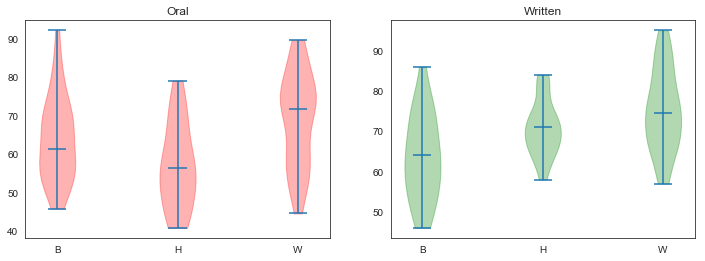

In [177]:
data_to_plot_oral = [np.array(B['Oral']), np.array(H['Oral']), np.array(W['Oral'])]
data_to_plot_written = [np.array(B['Written']), np.array(H['Written']), np.array(W['Written'])]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

parts = axes[0].violinplot(data_to_plot_oral, points=20, widths=0.3,
                      showextrema=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_color('red')
axes[0].set_xticks(np.arange(len(u))+1)
axes[0].set_xticklabels(u)
axes[0].set_title('Oral')

parts1 = axes[1].violinplot(data_to_plot_written, points=20, widths=0.3,
                      showextrema=True, showmedians=True)
for pc1 in parts1['bodies']:
    pc1.set_color('green')
axes[1].set_xticks(np.arange(len(u))+1)
axes[1].set_xticklabels(u)
axes[1].set_title('Written')


plt.show()

Important for Kruskal:
- dependent variable is ordinal: Check 
- independet variable consists of two or mote categorical, independent groups: Check
- different participants in each group and no overlaps: Check
- distributions have the same shape: X

Since the distributions have different shapes we can only compare the mean ranks

In [178]:
kruskal(np.array(B['Combine']), np.array(H['Combine']), np.array(W['Combine']))

KruskalResult(statistic=20.258088910296966, pvalue=3.990358233971385e-05)

--> failed to reject null hypothesis